# Basic Data Analytics Assignment

This notebook demonstrates how to load, explore, analyze, and visualize a dataset using Python libraries such as pandas, matplotlib, and seaborn. The Iris dataset is used as an example.

In [1]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Enable inline plotting for Jupyter
%matplotlib inline

In [2]:
# Load the Dataset with Error Handling
from sklearn.datasets import load_iris

try:
    iris = load_iris(as_frame=True)
    df = iris.frame
    print("Iris dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")

Iris dataset loaded successfully!


In [3]:
# Initial Data Exploration
# Display the first five rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Check Data Types and Missing Values
print("Data Types:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB

Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [5]:
# Clean the Dataset
# The Iris dataset does not have missing values, but here is how you would handle them:
if df.isnull().sum().sum() > 0:
    # Option 1: Drop rows with missing values
    df_clean = df.dropna()
    # Option 2: Fill missing values (example: fill with mean)
    # df_clean = df.fillna(df.mean(numeric_only=True))
    print("Missing values handled.")
else:
    df_clean = df.copy()
    print("No missing values found.")

No missing values found.


In [6]:
# Compute Basic Statistics
# Use .describe() for summary statistics
basic_stats = df_clean.describe()
basic_stats

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
# Group and Aggregate Data
# Group by species and compute the mean of each numerical column
species_group_means = df_clean.groupby('target').mean(numeric_only=True)
species_group_means

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


## Findings and Observations

- The Iris dataset contains 150 samples with no missing values.
- Each species (target) has distinct mean values for sepal and petal measurements.
- There are clear differences in petal length and width between species, which can be useful for classification.
- The dataset is well-structured and suitable for basic data analysis and visualization tasks.

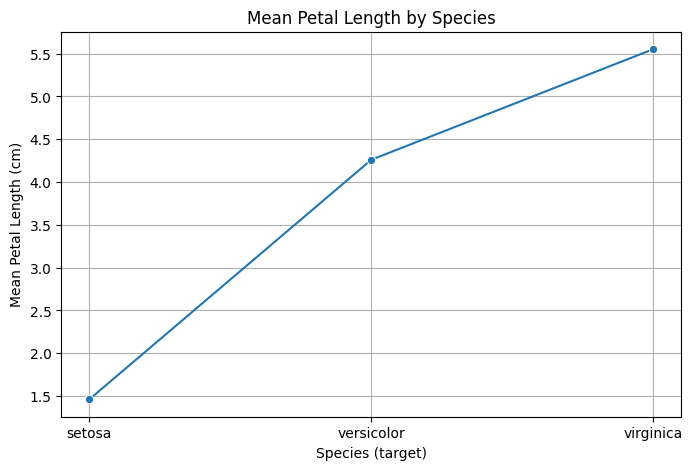

In [8]:
# Line Chart Visualization
# Plot the mean petal length for each species
plt.figure(figsize=(8,5))
sns.lineplot(x=species_group_means.index, y=species_group_means['petal length (cm)'], marker='o')
plt.title('Mean Petal Length by Species')
plt.xlabel('Species (target)')
plt.ylabel('Mean Petal Length (cm)')
plt.xticks(species_group_means.index, iris.target_names)
plt.grid(True)
plt.show()

C:\Users\Bramwel\AppData\Local\Temp\ipykernel_15788\2290823903.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=species_group_means.index, y=species_group_means['sepal width (cm)'], palette='viridis')


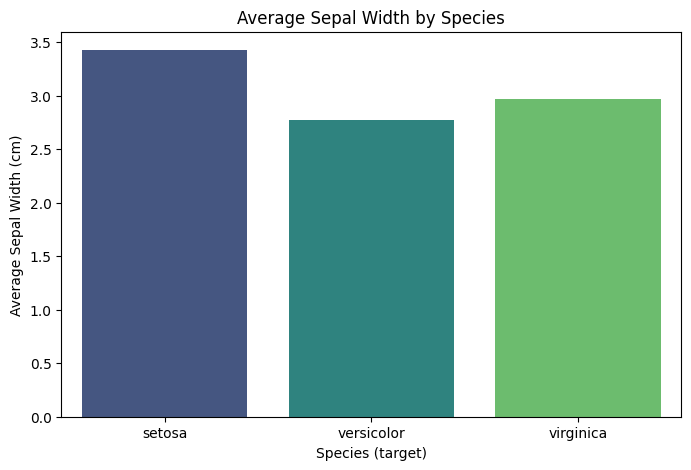

In [9]:
# Bar Chart Visualization
# Bar chart of average sepal width per species
plt.figure(figsize=(8,5))
sns.barplot(x=species_group_means.index, y=species_group_means['sepal width (cm)'], palette='viridis')
plt.title('Average Sepal Width by Species')
plt.xlabel('Species (target)')
plt.ylabel('Average Sepal Width (cm)')
plt.xticks(species_group_means.index, iris.target_names)
plt.show()

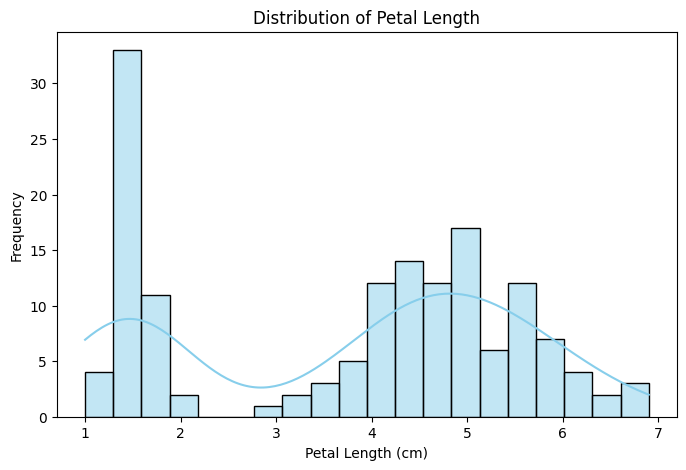

In [10]:
# Histogram Visualization
# Histogram of petal length
plt.figure(figsize=(8,5))
sns.histplot(df_clean['petal length (cm)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()

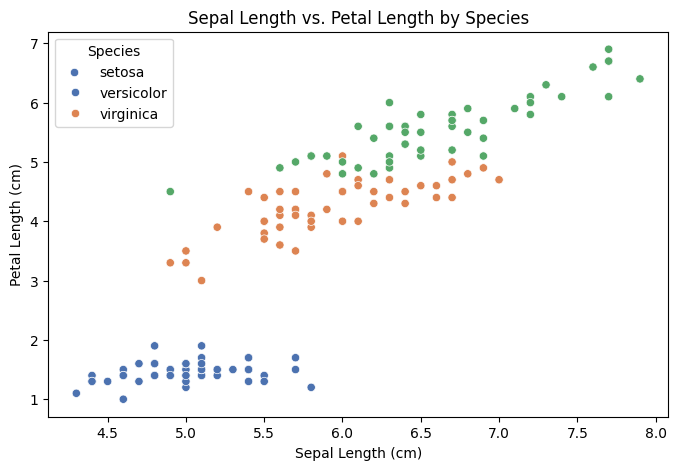

In [11]:
# Scatter Plot Visualization
# Scatter plot of sepal length vs. petal length, colored by species
plt.figure(figsize=(8,5))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='target', palette='deep', data=df_clean)
plt.title('Sepal Length vs. Petal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species', labels=iris.target_names)
plt.show()

## Conclusion

This notebook demonstrated how to load, clean, analyze, and visualize a dataset using pandas, matplotlib, and seaborn. The Iris dataset was used as an example, and several types of plots were created to explore the data. You can try these steps with other datasets for further practice!